In [5]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

16000
(1025, 867)
Duration of the audio: 27.74 seconds


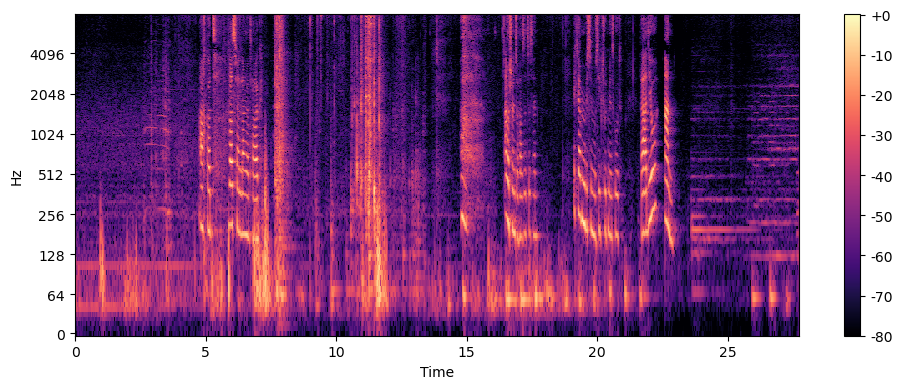

In [3]:
wav_path = "C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\development_scenes\\wav\\scenes\\3_speech_true_Radio_an.wav"

y, sr = librosa.load(wav_path, sr=None)
print(sr)
n_fft = 2048  # Window size
hop_length = 512  # Hop length

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
print(np.shape(S))
# compute to db
S_db = librosa.amplitude_to_db(S, ref=np.max)

# spectrogram
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

image = S_db_normalized.astype(np.uint8)


# Number of frames
num_frames = S.shape[1]

duration = (num_frames * hop_length) / sr

print(f"Duration of the audio: {duration:.2f} seconds")

plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f')
plt.tight_layout()
plt.savefig('spectrogram_image.png')  
plt.show()

In [40]:
print(np.shape(S))

(1025, 867)


In [31]:
librosa.get_duration(y=y, sr=sr)

27.732

In [32]:
np.shape(S)

(1025, 867)

In [27]:
labels_csv = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scene_annotations.csv')
labels_csv.head()
labels_names = pd.read_csv(r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scene_annotations.csv')



In [21]:
name = labels_names.iloc[59, 1]
name =name.split(" ")
print(name[0] + " " + name[1])

Licht aus


In [28]:
start_time = labels_csv.iloc[1,2]

end_time = labels_csv.iloc[1,3]
#end_time = (697.5 * hop_length) / sr

In [29]:

start_f = start_time*sr/(hop_length)
end_f = end_time*sr/(hop_length)
print(f"starts at frame: {start_f} and ends at: {end_f}")

starts at frame: 671.2624999999999 and ends at: 724.4009375


In [60]:
import pandas as pd
import librosa
import sounddevice as sd
import numpy as np

data = {
    'filename': ['3_speech_true_Radio_an'],
    'command': ['Radio an'],
    'start': [start_time],
    'end': [end_time]
}

labels_csv = pd.DataFrame(data)

wav_path = "C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\development_scenes\\wav\\scenes\\3_speech_true_Radio_an.wav"

y, sr = librosa.load(wav_path, sr=None)
print(sr)
hop_length = 512

start_f = start_time * sr / hop_length
end_f = end_time * sr / hop_length
print(f"Starts at frame: {start_f} and ends at: {end_f}")

start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
print(f"Start sample: {start_sample} and End sample: {end_sample}")

segment = y[start_sample:end_sample]

sd.play(segment, sr)
sd.wait()  

16000
Starts at frame: 264.120625 and ends at: 314.91312500000004
Start sample: 135229 and End sample: 161235


(27207,)

In [53]:
import os
import pandas as pd
import numpy as np
import librosa
import cv2
from matplotlib import pyplot as plt

# Load CSV file
csv_file = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scene_annotations.csv'
labels_df = pd.read_csv(csv_file)

# Directory paths
wav_dir = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes'
output_dir = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\tests'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to process each entry
def process_entry(filename, command, start, end):
    wav_path = os.path.join(wav_dir, filename + '.wav')
    
    # Load the audio file
    y, sr = librosa.load(wav_path, sr=None)
    
    # Compute the spectrogram
    n_fft = 2048
    hop_length = 512
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    
    # Normalize spectrogram for image conversion
    S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    image = S_db_normalized.astype(np.uint8)
    
    # Number of frames and duration
    num_frames = S.shape[1]
    duration = (num_frames * hop_length) / sr
    
    # Calculate middle point of the window
    middle_time = (start + end) / 2
    middle_frame = int((middle_time / duration) * num_frames)
    
    # Get window dimensions in frames
    start_frame = int((start / duration) * num_frames)
    end_frame = int((end / duration) * num_frames)
    window_width = end_frame - start_frame
    
    # Compute x and y values in percentage
    x = middle_frame / num_frames
    y = 0.5  # Assuming the y-coordinate in the middle for simplicity
    width = window_width / num_frames
    height = 0.5  # Assuming a fixed height for simplicity
    
    # Save spectrogram image
    plt.imsave(os.path.join(output_dir, filename + '.png'), image, cmap='gray')
    
    # Write to text file
    txt_filename = os.path.join(output_dir, filename + '.txt')
    with open(txt_filename, 'a') as f:
        f.write(f'{command} {x:.6f} {y:.6f} {width:.6f} {height:.6f}\n')

# Process each entry in the CSV file
for index, row in labels_df.iterrows():
    process_entry(row['filename'], row['command'], row['start'], row['end'])

Sample rate: 16000
Duration of the audio: 16.99 seconds
Word 1 segment from sample 179712 to 186368
Word 2 segment from sample 186368 to 193024
Playing word_1...
Playing word_2...
Sample rate: 16000
Duration of the audio: 17.44 seconds
Word 1 segment from sample 343552 to 343552
Word 2 segment from sample 343552 to 343552
Playing word_1...
Playing word_2...
Sample rate: 16000
Duration of the audio: 12.13 seconds
Word 1 segment from sample 230912 to 230912
Word 2 segment from sample 230912 to 230912
Playing word_1...
Playing word_2...
Sample rate: 16000
Duration of the audio: 19.30 seconds
Word 1 segment from sample 98304 to 105984
Word 2 segment from sample 105984 to 114176
Playing word_1...
Playing word_2...
Sample rate: 16000
Duration of the audio: 14.30 seconds
Word 1 segment from sample 135168 to 147968
Word 2 segment from sample 147968 to 160768
Playing word_1...


KeyboardInterrupt: 

Sample rate: 16000
Duration of the audio: 27.74 seconds


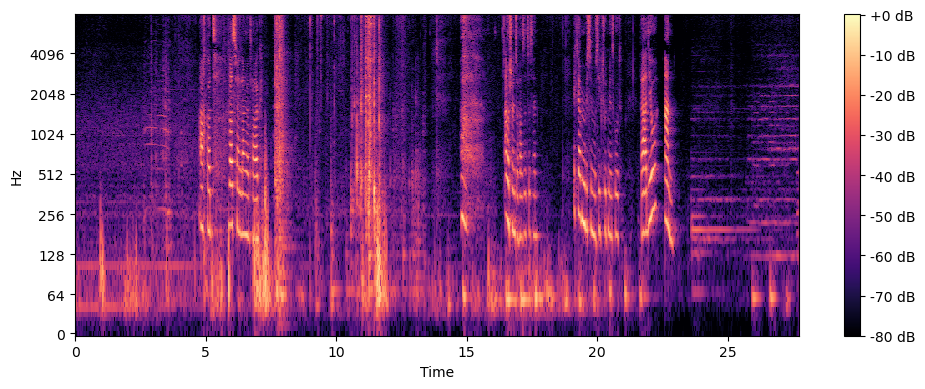

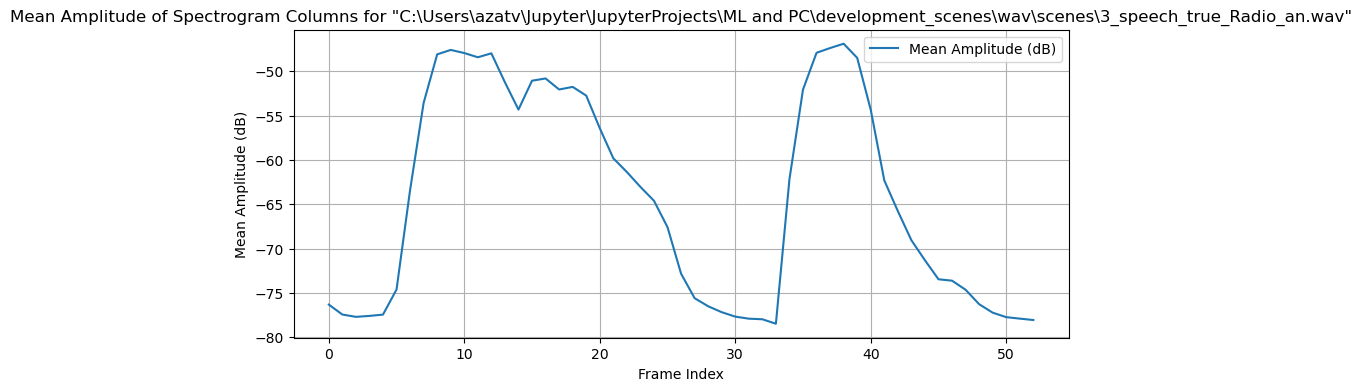

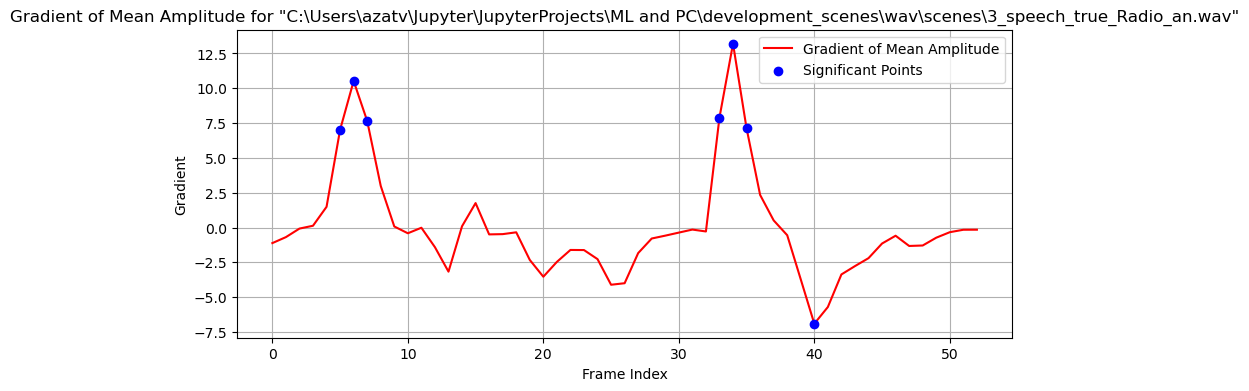

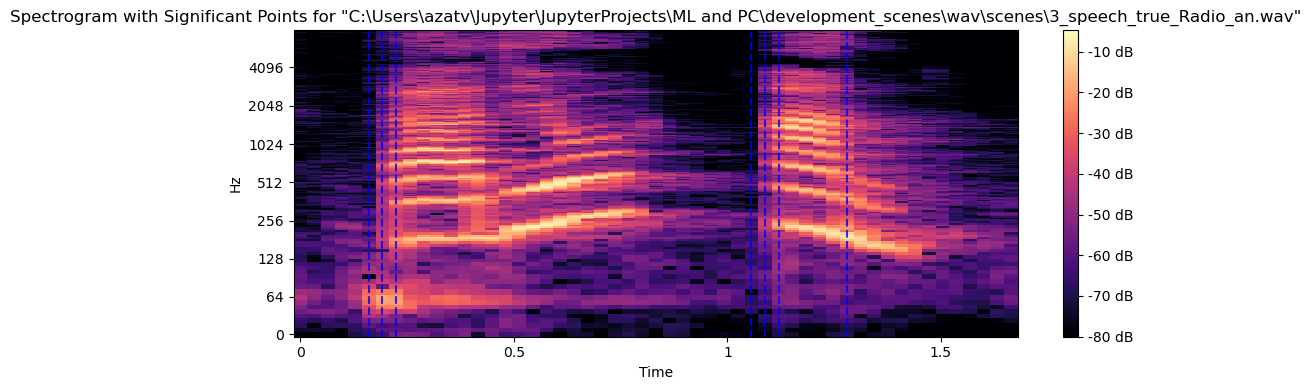

In [31]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import cv2
from scipy.signal import find_peaks

# Load the audio file
wav_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes\3_speech_true_Radio_an.wav"
y, sr = librosa.load(wav_path, sr=None)
print(f"Sample rate: {sr}")

# Parameters for spectrogram
n_fft = 2048
hop_length = 512

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Normalize the spectrogram for image visualization
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
image = S_db_normalized.astype(np.uint8)

# Number of frames
num_frames = S.shape[1]
duration = (num_frames * hop_length) / sr
print(f"Duration of the audio: {duration:.2f} seconds")

# Define the start and end times of the command
start_time = 21.4804
end_time = 23.18083

# Convert times to frame indices
start_frame = int(start_time / duration * num_frames)
end_frame = int(end_time / duration * num_frames)

# Extract the relevant segment
segment = S_db[:, start_frame:end_frame]

# Compute the mean for each column
means = np.mean(segment, axis=0)

# Compute the gradient of the means
gradients = np.gradient(means)

# Find local minima and maxima
min_indices = find_peaks(-gradients)[0]
max_indices = find_peaks(gradients)[0]

# Ensure we have exactly 3 minima and 2 maxima
def select_min_max_points(min_indices, max_indices, gradients):
    # Sort minima by gradient value (descending) and select top 3
    min_indices = min_indices[np.argsort(gradients[min_indices])][:3]
    min_indices = np.sort(min_indices)  # Sort them in ascending order

    # Ensure we have exactly 2 maxima within the range of minima
    max_indices = max_indices[np.argsort(-gradients[max_indices])]
    selected_max_indices = []
    for min_idx in range(len(min_indices) - 1):
        max_in_range = [max_idx for max_idx in max_indices if min_indices[min_idx] < max_idx < min_indices[min_idx + 1]]
        if max_in_range:
            selected_max_indices.append(max_in_range[0])  # Select the first maximum within the range
    selected_max_indices = np.array(selected_max_indices[:2])

    return min_indices, selected_max_indices

min_indices, max_indices = select_min_max_points(min_indices, max_indices, gradients)

# Plot the means
plt.figure(figsize=(10, 4))
plt.plot(means, label='Mean Amplitude (dB)')
plt.scatter(min_indices, means[min_indices], color='red', zorder=5, label='Min Points')
plt.scatter(max_indices, means[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Mean Amplitude (dB)')
plt.title(f'Mean Amplitude of Spectrogram Columns for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the gradient of the means
plt.figure(figsize=(10, 4))
plt.plot(gradients, label='Gradient of Mean Amplitude', color='red')
plt.scatter(min_indices, gradients[min_indices], color='blue', zorder=5, label='Min Points')
plt.scatter(max_indices, gradients[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Gradient')
plt.title(f'Gradient of Mean Amplitude for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the spectrogram with vertical lines at min and max points
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db[:, start_frame:end_frame], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
for sp in min_indices:
    plt.axvline(x=sp * hop_length / sr, color='red', linestyle='--', alpha=0.8)
for sp in max_indices:
    plt.axvline(x=sp * hop_length / sr, color='green', linestyle='--', alpha=0.8)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram with Min and Max Points for "{wav_path}"')
plt.tight_layout()
plt.show()


Sample rate: 16000
Duration of the audio: 27.74 seconds


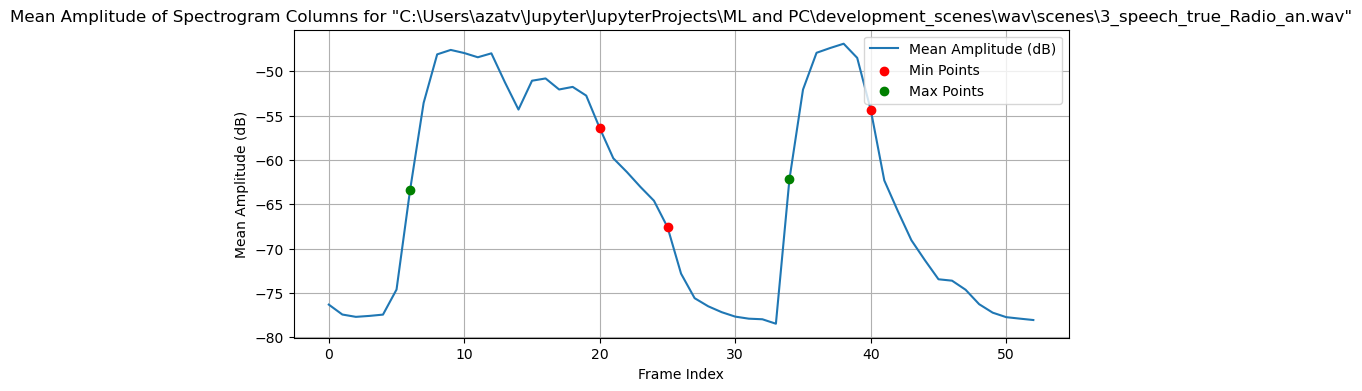

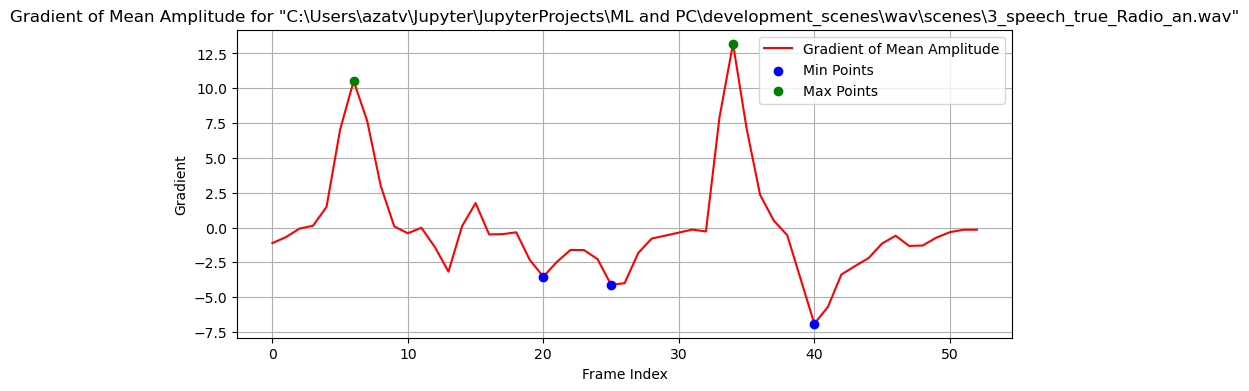

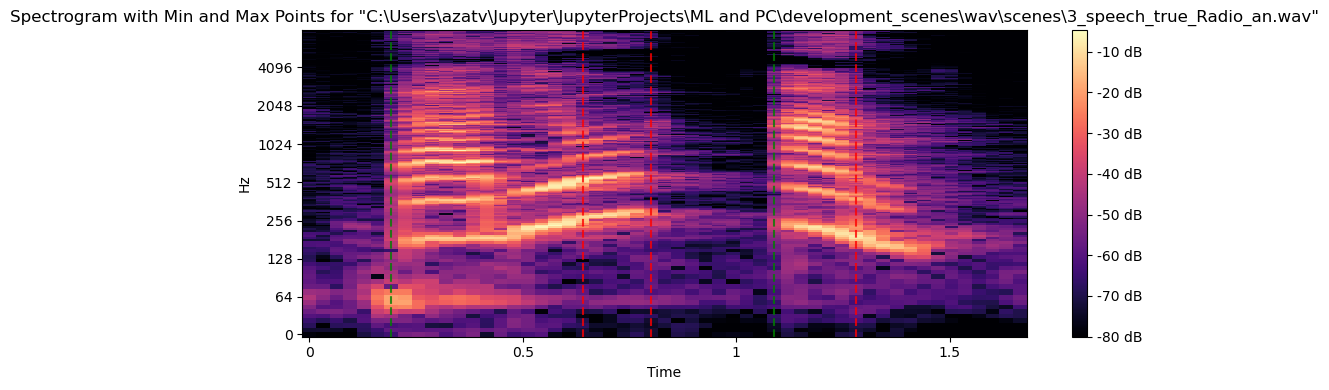

In [33]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import cv2
from scipy.signal import find_peaks

# Load the audio file
wav_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes\3_speech_true_Radio_an.wav"
y, sr = librosa.load(wav_path, sr=None)
print(f"Sample rate: {sr}")

# Parameters for spectrogram
n_fft = 2048
hop_length = 512

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Normalize the spectrogram for image visualization
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
image = S_db_normalized.astype(np.uint8)

# Number of frames
num_frames = S.shape[1]
duration = (num_frames * hop_length) / sr
print(f"Duration of the audio: {duration:.2f} seconds")

# Define the start and end times of the command
start_time = 21.4804
end_time = 23.18083

# Convert times to frame indices
start_frame = int(start_time / duration * num_frames)
end_frame = int(end_time / duration * num_frames)

# Extract the relevant segment
segment = S_db[:, start_frame:end_frame]

# Compute the mean for each column
means = np.mean(segment, axis=0)

# Compute the gradient of the means
gradients = np.gradient(means)

# Find local minima and maxima
min_indices = find_peaks(-gradients)[0]
max_indices = find_peaks(gradients)[0]

# Filter minima and maxima to ensure they follow the rules
min_indices = min_indices[np.argsort(gradients[min_indices])]
max_indices = max_indices[np.argsort(-gradients[max_indices])]

# Ensure we have 3 minima and 2 maxima points
if len(min_indices) >= 3 and len(max_indices) >= 2:
    min_indices = min_indices[:3]
    max_indices = max_indices[:2]

# Plot the means
plt.figure(figsize=(10, 4))
plt.plot(means, label='Mean Amplitude (dB)')
plt.scatter(min_indices, means[min_indices], color='red', zorder=5, label='Min Points')
plt.scatter(max_indices, means[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Mean Amplitude (dB)')
plt.title(f'Mean Amplitude of Spectrogram Columns for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the gradient of the means
plt.figure(figsize=(10, 4))
plt.plot(gradients, label='Gradient of Mean Amplitude', color='red')
plt.scatter(min_indices, gradients[min_indices], color='blue', zorder=5, label='Min Points')
plt.scatter(max_indices, gradients[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Gradient')
plt.title(f'Gradient of Mean Amplitude for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the spectrogram with vertical lines at min and max points
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db[:, start_frame:end_frame], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
for sp in min_indices:
    plt.axvline(x=sp * hop_length / sr, color='red', linestyle='--', alpha=0.8)
for sp in max_indices:
    plt.axvline(x=sp * hop_length / sr, color='green', linestyle='--', alpha=0.8)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram with Min and Max Points for "{wav_path}"')
plt.tight_layout()
plt.show()

In [35]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import find_peaks

# Define the start and end times of the command
start_time = 21.4804
end_time = 23.18083

data = {
    'filename': ['3_speech_true_Radio_an'],
    'command': ['Radio an'],
    'start': [start_time],
    'end': [end_time]
}

labels_csv = pd.DataFrame(data)

wav_path = "C:\\Users\\azatv\\Jupyter\\JupyterProjects\\ML and PC\\development_scenes\\wav\\scenes\\3_speech_true_Radio_an.wav"

# Load the audio file
y, sr = librosa.load(wav_path, sr=None)

hop_length = 512

start_f = start_time * sr / hop_length
end_f = end_time * sr / hop_length
print(f"Starts at frame: {start_f} and ends at: {end_f}")

start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
print(f"Start sample: {start_sample} and End sample: {end_sample}")

# Parameters for spectrogram
n_fft = 2048

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Extract the relevant segment
segment = S_db[:, int(start_f):int(end_f)]

# Compute the mean for each column
means = np.mean(segment, axis=0)

# Compute the gradient of the means
gradients = np.gradient(means)

# Find local minima and maxima
min_indices = find_peaks(-gradients)[0]
max_indices = find_peaks(gradients)[0]

# Ensure we have exactly 3 minima and 2 maxima
def select_min_max_points(min_indices, max_indices, gradients):
    # Sort minima by gradient value (descending) and select top 3
    min_indices = min_indices[np.argsort(gradients[min_indices])][:3]
    min_indices = np.sort(min_indices)  # Sort them in ascending order

    # Ensure we have exactly 2 maxima within the range of minima
    max_indices = max_indices[np.argsort(-gradients[max_indices])]
    selected_max_indices = []
    for min_idx in range(len(min_indices) - 1):
        max_in_range = [max_idx for max_idx in max_indices if min_indices[min_idx] < max_idx < min_indices[min_idx + 1]]
        if max_in_range:
            selected_max_indices.append(max_in_range[0])  # Select the first maximum within the range
    selected_max_indices = np.array(selected_max_indices[:2])

    return min_indices, selected_max_indices

min_indices, max_indices = select_min_max_points(min_indices, max_indices, gradients)

# Convert frame indices to sample indices
min_samples = (min_indices + int(start_f)) * hop_length
max_samples = (max_indices + int(start_f)) * hop_length

# Ensure the correct length
min_samples = min_samples.astype(int)
max_samples = max_samples.astype(int)

# Dictionary to store word segments
word_segments = {}

# Extract and store each word segment
for i, (min_start, min_end) in enumerate(zip(min_samples[:-1], min_samples[1:])):
    segment = y[min_start:min_end]
    word_segments[f'word_{i+1}'] = segment
    print(f"Word {i+1} segment from sample {min_start} to {min_end}")

# Play each word segment
for key, segment in word_segments.items():
    print(f"Playing {key}...")
    sd.play(segment, sr)
    sd.wait()



Starts at frame: 671.2624999999999 and ends at: 724.4009375
Start sample: 343686 and End sample: 370893
Word 1 segment from sample 353792 to 356352
Word 2 segment from sample 356352 to 364032
Playing word_1...
Playing word_2...


Sample rate: 16000
Duration of the audio: 27.74 seconds
Word 1 segment from sample 353792 to 356352
Word 2 segment from sample 356352 to 364032
Playing word_1...
Playing word_2...


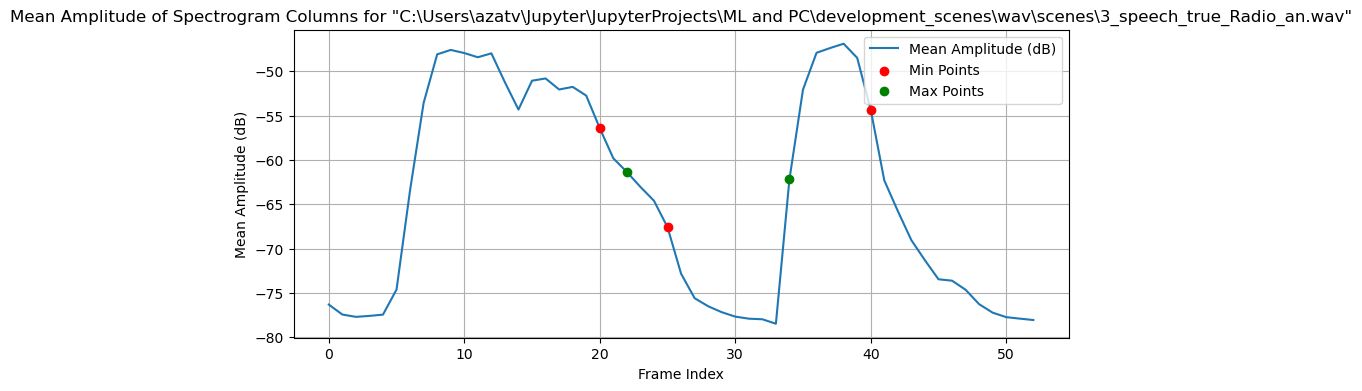

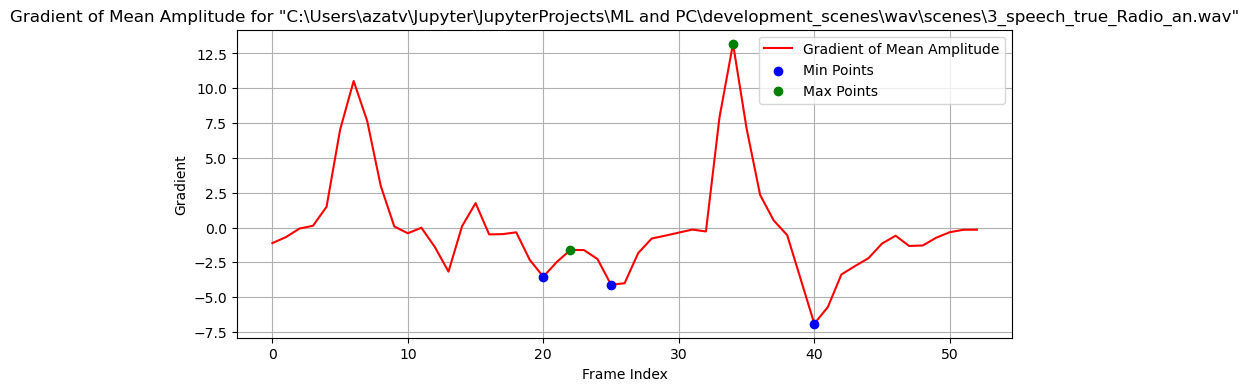

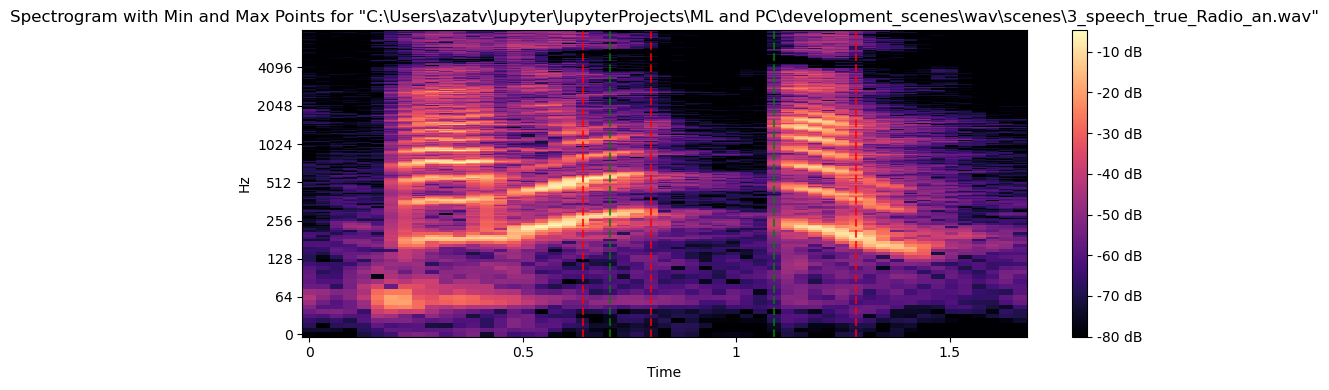

In [45]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import find_peaks

# Load the audio file
wav_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes\3_speech_true_Radio_an.wav"
y, sr = librosa.load(wav_path, sr=None)
print(f"Sample rate: {sr}")

# Parameters for spectrogram
n_fft = 2048
hop_length = 512

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Normalize the spectrogram for image visualization
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
image = S_db_normalized.astype(np.uint8)

# Number of frames
num_frames = S.shape[1]
duration = (num_frames * hop_length) / sr
print(f"Duration of the audio: {duration:.2f} seconds")

# Define the start and end times of the command
start_time = 21.4804
end_time = 23.18083

# Convert times to frame indices
start_frame = int(start_time / duration * num_frames)
end_frame = int(end_time / duration * num_frames)

# Extract the relevant segment
segment = S_db[:, start_frame:end_frame]

# Compute the mean for each column
means = np.mean(segment, axis=0)

# Compute the gradient of the means
gradients = np.gradient(means)

# Find local minima and maxima
min_indices = find_peaks(-gradients)[0]
max_indices = find_peaks(gradients)[0]

# Ensure we have exactly 3 minima and 2 maxima
def select_min_max_points(min_indices, max_indices, gradients):
    # Sort minima by gradient value (descending) and select top 3
    min_indices = min_indices[np.argsort(gradients[min_indices])][:3]
    min_indices = np.sort(min_indices)  # Sort them in ascending order

    # Ensure we have exactly 2 maxima within the range of minima
    max_indices = max_indices[np.argsort(-gradients[max_indices])]
    selected_max_indices = []
    for min_idx in range(len(min_indices) - 1):
        max_in_range = [max_idx for max_idx in max_indices if min_indices[min_idx] < max_idx < min_indices[min_idx + 1]]
        if max_in_range:
            selected_max_indices.append(max_in_range[0])  # Select the first maximum within the range
    selected_max_indices = np.array(selected_max_indices[:2])

    return min_indices, selected_max_indices

min_indices, max_indices = select_min_max_points(min_indices, max_indices, gradients)

# Convert frame indices to sample indices
min_samples = (min_indices + start_frame) * hop_length
max_samples = (max_indices + start_frame) * hop_length

# Ensure the correct length
min_samples = min_samples.astype(int)
max_samples = max_samples.astype(int)

# Dictionary to store word segments
word_segments = {}

# Extract and store each word segment
for i, (min_start, min_end) in enumerate(zip(min_samples[:-1], min_samples[1:])):
    segment = y[min_start:min_end]
    word_segments[f'word_{i+1}'] = segment
    print(f"Word {i+1} segment from sample {min_start} to {min_end}")

# Play each word segment
for key, segment in word_segments.items():
    print(f"Playing {key}...")
    sd.play(segment, sr)
    sd.wait()
    
# Plot the means
plt.figure(figsize=(10, 4))
plt.plot(means, label='Mean Amplitude (dB)')
plt.scatter(min_indices, means[min_indices], color='red', zorder=5, label='Min Points')
plt.scatter(max_indices, means[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Mean Amplitude (dB)')
plt.title(f'Mean Amplitude of Spectrogram Columns for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the gradient of the means
plt.figure(figsize=(10, 4))
plt.plot(gradients, label='Gradient of Mean Amplitude', color='red')
plt.scatter(min_indices, gradients[min_indices], color='blue', zorder=5, label='Min Points')
plt.scatter(max_indices, gradients[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Gradient')
plt.title(f'Gradient of Mean Amplitude for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the spectrogram with vertical lines at min and max points
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db[:, start_frame:end_frame], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
for sp in min_indices:
    plt.axvline(x=sp * hop_length / sr, color='red', linestyle='--', alpha=0.8)
for sp in max_indices:
    plt.axvline(x=sp * hop_length / sr, color='green', linestyle='--', alpha=0.8)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram with Min and Max Points for "{wav_path}"')
plt.tight_layout()
plt.show()


Sample rate: 16000
Duration of the audio: 27.74 seconds
Word 1 segment from sample 344576 to 350720
Word 2 segment from sample 350720 to 360448
Playing word_1...
Playing word_2...


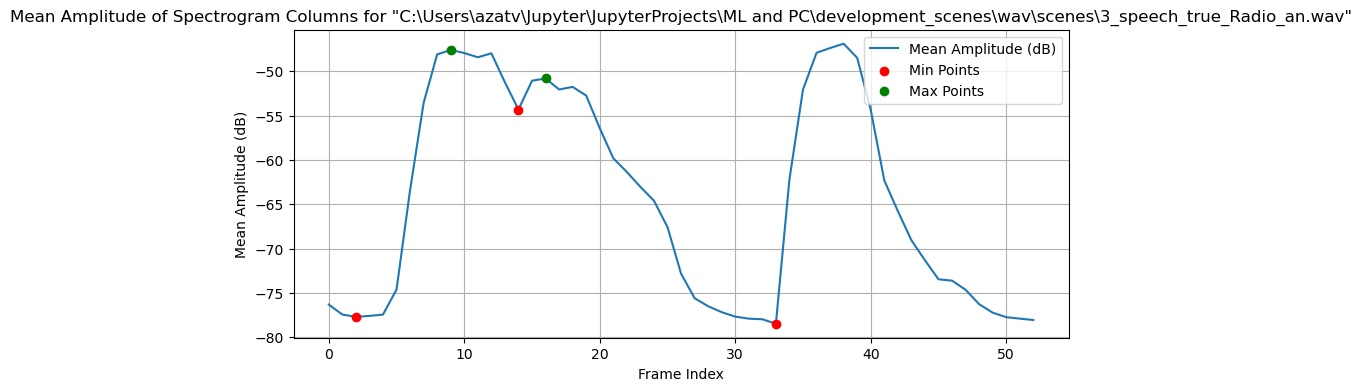

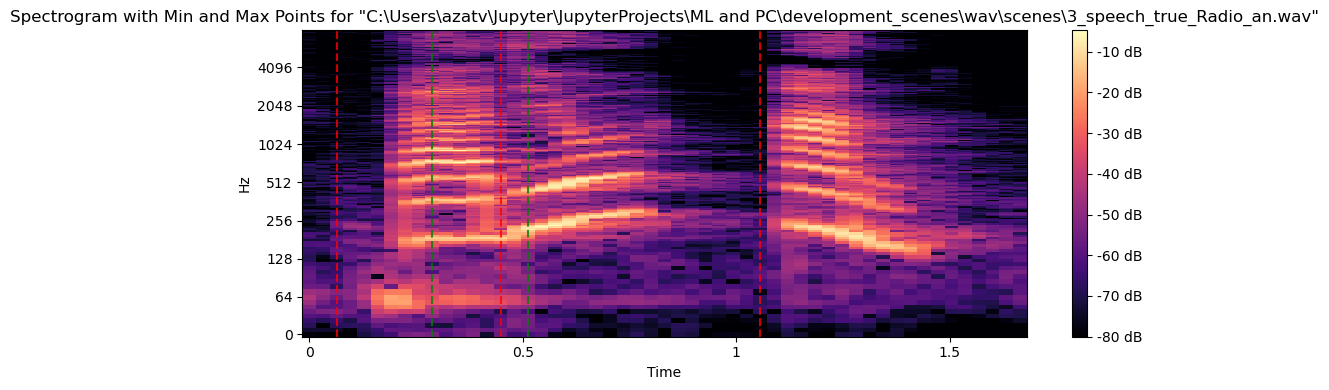

In [37]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import find_peaks

# Load the audio file
wav_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes\3_speech_true_Radio_an.wav"
y, sr = librosa.load(wav_path, sr=None)
print(f"Sample rate: {sr}")

# Parameters for spectrogram
n_fft = 2048
hop_length = 512

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Normalize the spectrogram for image visualization
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
image = S_db_normalized.astype(np.uint8)

# Number of frames
num_frames = S.shape[1]
duration = (num_frames * hop_length) / sr
print(f"Duration of the audio: {duration:.2f} seconds")

# Define the start and end times of the command
start_time = 21.4804
end_time = 23.18083

# Convert times to frame indices
start_frame = int(start_time / duration * num_frames)
end_frame = int(end_time / duration * num_frames)

# Extract the relevant segment
segment = S_db[:, start_frame:end_frame]

# Compute the mean for each column
means = np.mean(segment, axis=0)

# Find local minima and maxima in the means
min_indices = find_peaks(-means)[0]
max_indices = find_peaks(means)[0]

# Ensure we have exactly 3 minima and 2 maxima
def select_min_max_points(min_indices, max_indices, means):
    # Sort minima by mean value (ascending) and select top 3
    min_indices = min_indices[np.argsort(means[min_indices])][:3]
    min_indices = np.sort(min_indices)  # Sort them in ascending order

    # Ensure we have exactly 2 maxima within the range of minima
    max_indices = max_indices[np.argsort(-means[max_indices])]
    selected_max_indices = []
    for min_idx in range(len(min_indices) - 1):
        max_in_range = [max_idx for max_idx in max_indices if min_indices[min_idx] < max_idx < min_indices[min_idx + 1]]
        if max_in_range:
            selected_max_indices.append(max_in_range[0])  # Select the first maximum within the range
    selected_max_indices = np.array(selected_max_indices[:2])

    return min_indices, selected_max_indices

min_indices, max_indices = select_min_max_points(min_indices, max_indices, means)

# Convert frame indices to sample indices
min_samples = (min_indices + start_frame) * hop_length
max_samples = (max_indices + start_frame) * hop_length

# Ensure the correct length
min_samples = min_samples.astype(int)
max_samples = max_samples.astype(int)

# Dictionary to store word segments
word_segments = {}

# Extract and store each word segment
for i, (min_start, min_end) in enumerate(zip(min_samples[:-1], min_samples[1:])):
    segment = y[min_start:min_end]
    word_segments[f'word_{i+1}'] = segment
    print(f"Word {i+1} segment from sample {min_start} to {min_end}")

# Play each word segment
for key, segment in word_segments.items():
    print(f"Playing {key}...")
    sd.play(segment, sr)
    sd.wait()
    
# Plot the means
plt.figure(figsize=(10, 4))
plt.plot(means, label='Mean Amplitude (dB)')
plt.scatter(min_indices, means[min_indices], color='red', zorder=5, label='Min Points')
plt.scatter(max_indices, means[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Mean Amplitude (dB)')
plt.title(f'Mean Amplitude of Spectrogram Columns for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the spectrogram with vertical lines at min and max points
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db[:, start_frame:end_frame], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
for sp in min_indices:
    plt.axvline(x=sp * hop_length / sr, color='red', linestyle='--', alpha=0.8)
for sp in max_indices:
    plt.axvline(x=sp * hop_length / sr, color='green', linestyle='--', alpha=0.8)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram with Min and Max Points for "{wav_path}"')
plt.tight_layout()
plt.show()


Sample rate: 16000
Duration of the audio: 27.74 seconds
Word 1 segment from sample 350720 to 360448
Playing word_1...


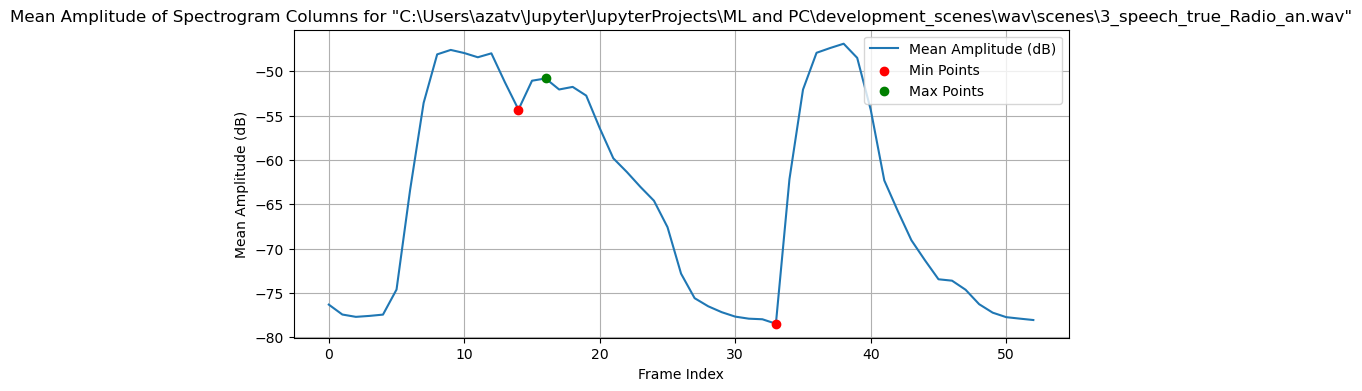

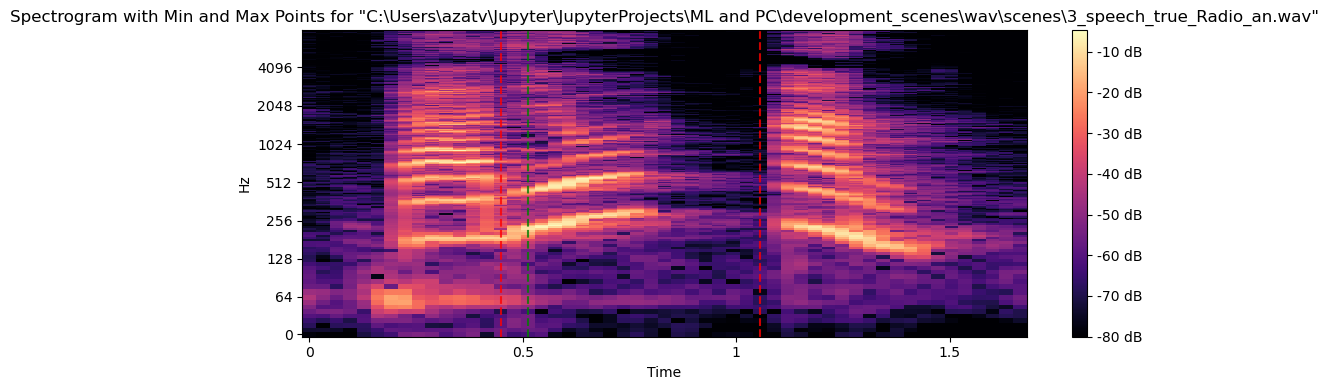

In [46]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import find_peaks

# Load the audio file
wav_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes\3_speech_true_Radio_an.wav"
y, sr = librosa.load(wav_path, sr=None)
print(f"Sample rate: {sr}")

# Parameters for spectrogram
n_fft = 2048
hop_length = 512

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Normalize the spectrogram for image visualization
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
image = S_db_normalized.astype(np.uint8)

# Number of frames
num_frames = S.shape[1]
duration = (num_frames * hop_length) / sr
print(f"Duration of the audio: {duration:.2f} seconds")

# Define the start and end times of the command
start_time = 21.4804
end_time = 23.18083

# Convert times to frame indices
start_frame = int(start_time / duration * num_frames)
end_frame = int(end_time / duration * num_frames)

# Extract the relevant segment
segment = S_db[:, start_frame:end_frame]

# Compute the mean for each column
means = np.mean(segment, axis=0)

# Find local minima and maxima in the means
min_indices = find_peaks(-means)[0]
max_indices = find_peaks(means)[0]

# Ensure we have exactly 3 minima and 2 maxima
def select_min_max_points(min_indices, max_indices, means):
    # Sort minima by mean value (ascending) and select top 3
    min_indices = min_indices[np.argsort(means[min_indices])]

    # Ensure minima are not too close to each other
    min_dists = np.diff(min_indices)
    min_indices = min_indices[np.insert(min_dists > len(means) * 0.1, 0, True)][:3]
    min_indices = np.sort(min_indices)  # Sort them in ascending order

    # Ensure we have exactly 2 maxima within the range of minima
    max_indices = max_indices[np.argsort(-means[max_indices])]
    selected_max_indices = []
    for min_idx in range(len(min_indices) - 1):
        max_in_range = [max_idx for max_idx in max_indices if min_indices[min_idx] < max_idx < min_indices[min_idx + 1]]
        if max_in_range:
            selected_max_indices.append(max_in_range[0])  # Select the first maximum within the range
    selected_max_indices = np.array(selected_max_indices[:2])

    return min_indices, selected_max_indices

min_indices, max_indices = select_min_max_points(min_indices, max_indices, means)

# Convert frame indices to sample indices
min_samples = (min_indices + start_frame) * hop_length
max_samples = (max_indices + start_frame) * hop_length

# Ensure the correct length
min_samples = min_samples.astype(int)
max_samples = max_samples.astype(int)

# Dictionary to store word segments
word_segments = {}

# Extract and store each word segment
for i, (min_start, min_end) in enumerate(zip(min_samples[:-1], min_samples[1:])):
    segment = y[min_start:min_end]
    word_segments[f'word_{i+1}'] = segment
    print(f"Word {i+1} segment from sample {min_start} to {min_end}")

# Play each word segment
for key, segment in word_segments.items():
    print(f"Playing {key}...")
    sd.play(segment, sr)
    sd.wait()
    
# Plot the means
plt.figure(figsize=(10, 4))
plt.plot(means, label='Mean Amplitude (dB)')
plt.scatter(min_indices, means[min_indices], color='red', zorder=5, label='Min Points')
plt.scatter(max_indices, means[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Mean Amplitude (dB)')
plt.title(f'Mean Amplitude of Spectrogram Columns for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the spectrogram with vertical lines at min and max points
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db[:, start_frame:end_frame], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
for sp in min_indices:
    plt.axvline(x=sp * hop_length / sr, color='red', linestyle='--', alpha=0.8)
for sp in max_indices:
    plt.axvline(x=sp * hop_length / sr, color='green', linestyle='--', alpha=0.8)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram with Min and Max Points for "{wav_path}"')
plt.tight_layout()
plt.show()


Sample rate: 16000
Duration of the audio: 27.74 seconds


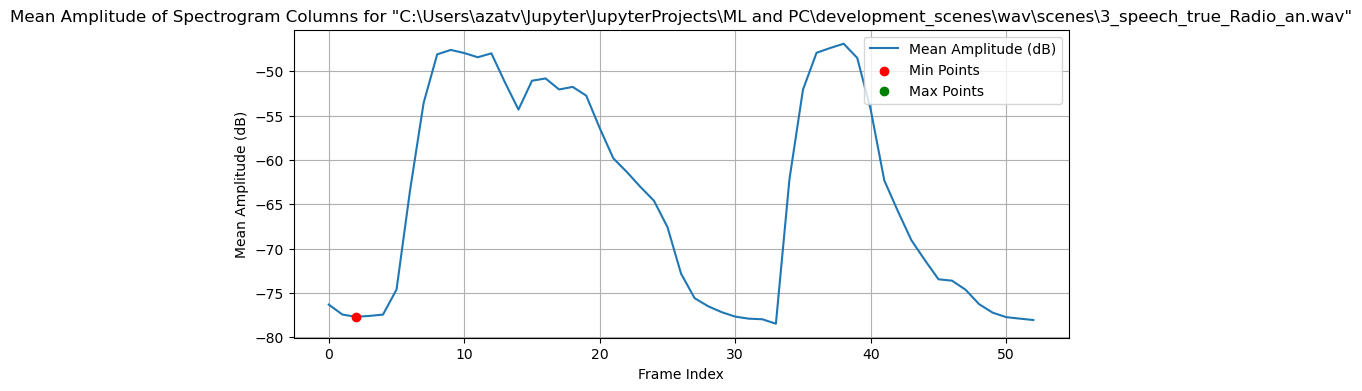

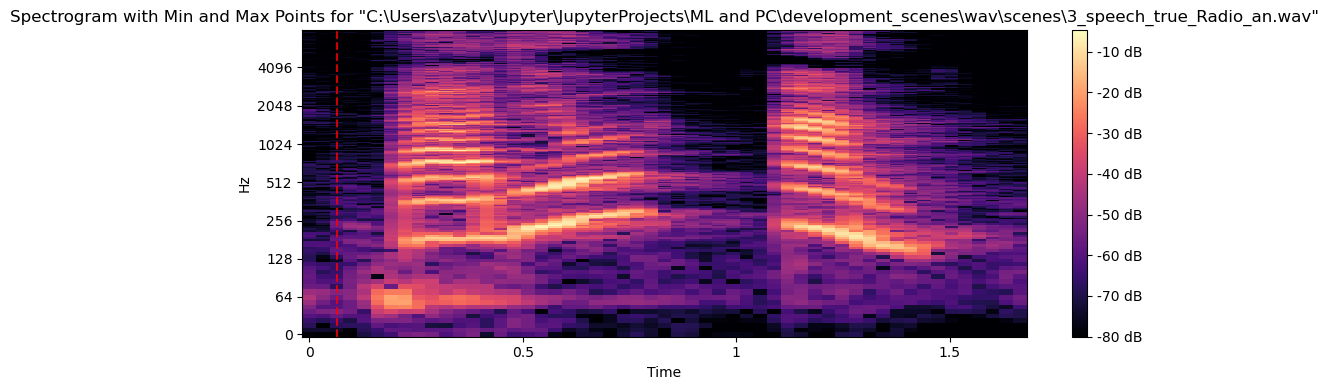

In [42]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import find_peaks

# Load the audio file
wav_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes\3_speech_true_Radio_an.wav"
y, sr = librosa.load(wav_path, sr=None)
print(f"Sample rate: {sr}")

# Parameters for spectrogram
n_fft = 2048
hop_length = 512

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Normalize the spectrogram for image visualization
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
image = S_db_normalized.astype(np.uint8)

# Number of frames
num_frames = S.shape[1]
duration = (num_frames * hop_length) / sr
print(f"Duration of the audio: {duration:.2f} seconds")

# Define the start and end times of the command
start_time = 21.4804
end_time = 23.18083

# Convert times to frame indices
start_frame = int(start_time / duration * num_frames)
end_frame = int(end_time / duration * num_frames)

# Extract the relevant segment
segment = S_db[:, start_frame:end_frame]

# Compute the mean for each column
means = np.mean(segment, axis=0)

# Find local minima and maxima in the means
min_indices = find_peaks(-means)[0]
max_indices = find_peaks(means)[0]

# Ensure we have exactly 3 minima and 2 maxima
def select_min_max_points(min_indices, max_indices, means, min_distance=5, min_height_diff=5):
    selected_min_indices = []
    selected_max_indices = []

    # Select minima ensuring they are spaced apart and lower than previous ones
    for idx in min_indices:
        if not selected_min_indices or (idx - selected_min_indices[-1] > min_distance and means[idx] < means[selected_min_indices[-1]] - min_height_diff):
            selected_min_indices.append(idx)
            if len(selected_min_indices) == 3:
                break

    selected_min_indices = np.array(selected_min_indices)

    # Select maxima within the range of minima
    for min_idx in range(len(selected_min_indices) - 1):
        max_in_range = [max_idx for max_idx in max_indices if selected_min_indices[min_idx] < max_idx < selected_min_indices[min_idx + 1]]
        if max_in_range:
            selected_max_indices.append(max_in_range[0])  # Select the first maximum within the range
    selected_max_indices = np.array(selected_max_indices[:2])

    return selected_min_indices, selected_max_indices

min_indices, max_indices = select_min_max_points(min_indices, max_indices, means)

# Ensure indices are integers
min_indices = min_indices.astype(int)
max_indices = max_indices.astype(int)

# Convert frame indices to sample indices
min_samples = (min_indices + start_frame) * hop_length
max_samples = (max_indices + start_frame) * hop_length

# Ensure the correct length
min_samples = min_samples.astype(int)
max_samples = max_samples.astype(int)

# Dictionary to store word segments
word_segments = {}

# Extract and store each word segment
for i, (min_start, min_end) in enumerate(zip(min_samples[:-1], min_samples[1:])):
    segment = y[min_start:min_end]
    word_segments[f'word_{i+1}'] = segment
    print(f"Word {i+1} segment from sample {min_start} to {min_end}")

# Play each word segment
for key, segment in word_segments.items():
    print(f"Playing {key}...")
    sd.play(segment, sr)
    sd.wait()

# Plot the means
plt.figure(figsize=(10, 4))
plt.plot(means, label='Mean Amplitude (dB)')
plt.scatter(min_indices, means[min_indices], color='red', zorder=5, label='Min Points')
plt.scatter(max_indices, means[max_indices], color='green', zorder=5, label='Max Points')
plt.xlabel('Frame Index')
plt.ylabel('Mean Amplitude (dB)')
plt.title(f'Mean Amplitude of Spectrogram Columns for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the spectrogram with vertical lines at min and max points
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db[:, start_frame:end_frame], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
for sp in min_indices:
    plt.axvline(x=sp * hop_length / sr, color='red', linestyle='--', alpha=0.8)
for sp in max_indices:
    plt.axvline(x=sp * hop_length / sr, color='green', linestyle='--', alpha=0.8)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram with Min and Max Points for "{wav_path}"')
plt.tight_layout()
plt.show()


Sample rate: 16000
Duration of the audio: 14.98 seconds
Word 1 segment from sample 201216 to 212992
Word 2 segment from sample 212992 to 224768
Playing word_1...
Playing word_2...


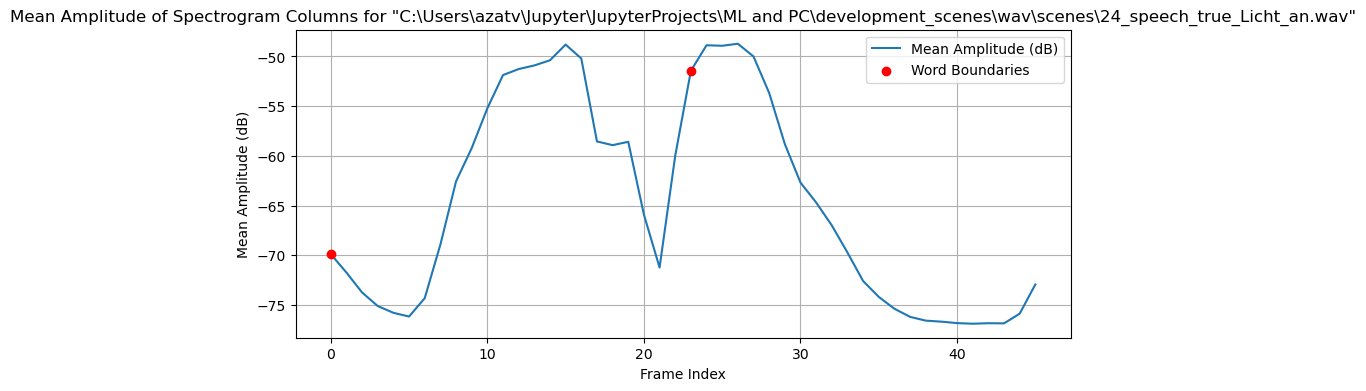

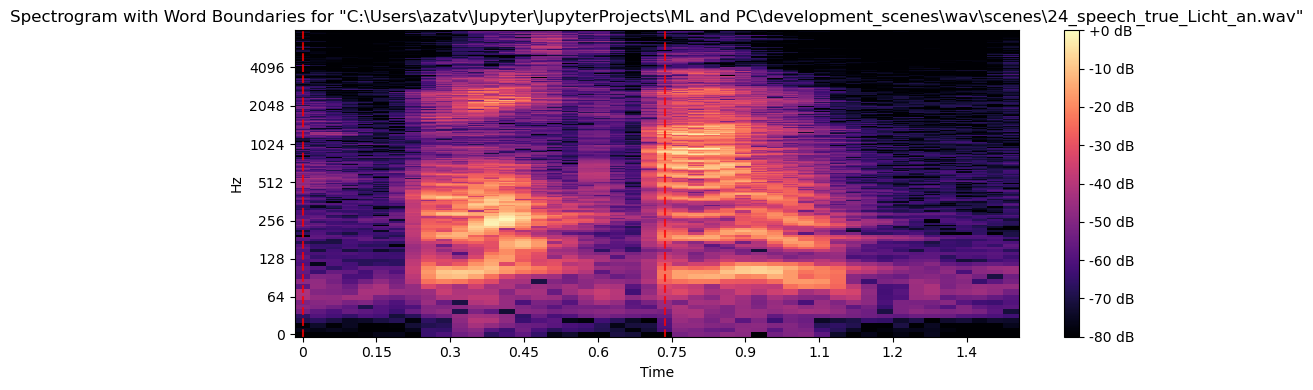

In [51]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.signal import find_peaks

# Load the audio file
wav_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes\24_speech_true_Licht_an.wav"
y, sr = librosa.load(wav_path, sr=None)
print(f"Sample rate: {sr}")

# Parameters for spectrogram
n_fft = 2048
hop_length = 512

# Compute the spectrogram
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Normalize the spectrogram for image visualization
S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
image = S_db_normalized.astype(np.uint8)

# Number of frames
num_frames = S.shape[1]
duration = (num_frames * hop_length) / sr
print(f"Duration of the audio: {duration:.2f} seconds")
#12.6053,14.055909999999999
# Define the start and end times of the command
start_time = 12.6053
end_time = 14.055909999999999

# Convert times to frame indices
start_frame = int(start_time / duration * num_frames)
end_frame = int(end_time / duration * num_frames)

# Extract the relevant segment
segment = S_db[:, start_frame:end_frame]

# Compute the mean for each column
means = np.mean(segment, axis=0)

# Find local minima and maxima in the means
min_indices = find_peaks(-means)[0]
max_indices = find_peaks(means)[0]

# Known transcript for alignment
transcript = "Staubsauger aus"

# Simple alignment function (for illustration purposes)
def align_transcript_to_audio(transcript, means, hop_length, sr):
    words = transcript.split()
    num_words = len(words)
    len_means = len(means)
    
    # Divide the means length by the number of words to estimate boundaries
    word_boundaries = np.linspace(0, len_means, num_words + 1, dtype=int)
    return word_boundaries

# Get word boundaries from the alignment function
word_boundaries = align_transcript_to_audio(transcript, means, hop_length, sr)

# Convert frame indices to sample indices
word_samples = (word_boundaries + start_frame) * hop_length
word_samples = word_samples.astype(int)

# Dictionary to store word segments
word_segments = {}

# Extract and store each word segment
for i in range(len(word_samples) - 1):
    segment = y[word_samples[i]:word_samples[i+1]]
    word_segments[f'word_{i+1}'] = segment
    print(f"Word {i+1} segment from sample {word_samples[i]} to {word_samples[i+1]}")

# Play each word segment
for key, segment in word_segments.items():
    print(f"Playing {key}...")
    sd.play(segment, sr)
    sd.wait()

# Plot the means
plt.figure(figsize=(10, 4))
plt.plot(means, label='Mean Amplitude (dB)')
plt.scatter(word_boundaries[:-1], means[word_boundaries[:-1]], color='red', zorder=5, label='Word Boundaries')
plt.xlabel('Frame Index')
plt.ylabel('Mean Amplitude (dB)')
plt.title(f'Mean Amplitude of Spectrogram Columns for "{wav_path}"')
plt.grid()
plt.legend()
plt.show()

# Plot the spectrogram with vertical lines at word boundaries
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db[:, start_frame:end_frame], sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
for wb in word_boundaries[:-1]:
    plt.axvline(x=wb * hop_length / sr, color='red', linestyle='--', alpha=0.8)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Spectrogram with Word Boundaries for "{wav_path}"')
plt.tight_layout()
plt.show()


In [59]:
import os
import pandas as pd
import numpy as np
import librosa
import cv2
from matplotlib import pyplot as plt
import sounddevice as sd

# Load CSV file
csv_file = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scene_annotations.csv'
labels_df = pd.read_csv(csv_file)

# Directory paths
wav_dir = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\wav\scenes'
output_dir = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\tests'

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to process each entry
def process_entry(filename, command, start, end):
    wav_path = os.path.join(wav_dir, filename + '.wav')
    
    # Load the audio file
    y, sr = librosa.load(wav_path, sr=None)
    
    # Compute the spectrogram
    n_fft = 2048
    hop_length = 512
    S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))
    S_db = librosa.amplitude_to_db(S, ref=np.max)
    
    # Normalize spectrogram for image conversion
    S_db_normalized = cv2.normalize(S_db, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    image = S_db_normalized.astype(np.uint8)
    
    # Number of frames and duration
    num_frames = S.shape[1]
    duration = (num_frames * hop_length) / sr
    
    # Calculate middle point of the window
    middle_time = (start + end) / 2
    middle_frame = int((middle_time / duration) * num_frames)
    
    # Get window dimensions in frames
    start_frame = int((start / duration) * num_frames)
    end_frame = int((end / duration) * num_frames)
    window_width = end_frame - start_frame
    
    # Segment the audio and compute word boundaries
    transcript = command.split()
    num_words = len(transcript)
    word_boundaries = np.linspace(start_frame, end_frame, num_words + 1, dtype=int)
    
    # Save spectrogram image
    plt.imsave(os.path.join(output_dir, filename + '.png'), image, cmap='gray')
    
    # Write to text file
    txt_filename = os.path.join(output_dir, filename + '.txt')
    with open(txt_filename, 'a') as f:
        for i in range(len(word_boundaries) - 1):
            word_start = word_boundaries[i]
            word_end = word_boundaries[i + 1]
            word_middle = (word_start + word_end) // 2
            
            x = word_middle / num_frames
            y = 0.5  # Assuming the y-coordinate in the middle for simplicity
            width = (word_end - word_start) / num_frames
            height = 0.5  # Assuming a fixed height for simplicity
            
            f.write(f'{transcript[i]} {x:.6f} {y:.6f} {width:.6f} {height:.6f}\n')
            
            # Convert frame indices to sample indices
            word_start_sample = word_start * hop_length
            word_end_sample = word_end * hop_length
            print(f"word start: {word_start_sample}")
            print(f"word end: {word_end_sample}")
            
            # Play each word segment
            segment = y[int(word_start_sample):int(word_end_sample)]
            print(f"Playing {transcript[i]} from sample {word_start_sample} to {word_end_sample} "
                  f"(time frame {word_start_sample / sr:.2f}s to {word_end_sample / sr:.2f}s)...")
            sd.play(segment, sr)
            sd.wait()
            input("Press Enter to continue...")

# Process each entry in the CSV file
for index, row in labels_df.iterrows():
    process_entry(row['filename'], row['command'], row['start'], row['end'])


word start: 179712
word end: 186368


TypeError: 'float' object is not subscriptable